# 50 StartUps Using Machine Learning(Multiple Linear Regression)
This dataset has data collected from New York, California and Florida about 50 business Startups "17 in each state". The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending.

This Dataset is used to build a model that helps in predicting a StartUps Profit/Success Rate.

# Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Dataset

In [18]:
df=pd.read_csv('C:\\Sravya Thumati\\My Projects Datasets\\50_Startups.csv')

In [19]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [20]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [21]:
df.isnull().sum() #No null values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [22]:
print(len(set(df['State'])))

3


In [23]:
print(set(df['State']))

{'California', 'Florida', 'New York'}


As there are ony three values we can encode these categorical values

In [24]:
var=pd.get_dummies(df['State'],drop_first=True)
print(var)

    Florida  New York
0         0         1
1         0         0
2         1         0
3         0         1
4         1         0
5         0         1
6         0         0
7         1         0
8         0         1
9         0         0
10        1         0
11        0         0
12        1         0
13        0         0
14        1         0
15        0         1
16        0         0
17        0         1
18        1         0
19        0         1
20        0         0
21        0         1
22        1         0
23        1         0
24        0         1
25        0         0
26        1         0
27        0         1
28        1         0
29        0         1
30        1         0
31        0         1
32        0         0
33        1         0
34        0         0
35        0         1
36        1         0
37        0         0
38        0         1
39        0         0
40        0         0
41        1         0
42        0         0
43        0         1
44        

In [27]:
x=df.iloc[:,0:4]
print(x)

    R&D Spend  Administration  Marketing Spend       State
0   165349.20       136897.80        471784.10    New York
1   162597.70       151377.59        443898.53  California
2   153441.51       101145.55        407934.54     Florida
3   144372.41       118671.85        383199.62    New York
4   142107.34        91391.77        366168.42     Florida
5   131876.90        99814.71        362861.36    New York
6   134615.46       147198.87        127716.82  California
7   130298.13       145530.06        323876.68     Florida
8   120542.52       148718.95        311613.29    New York
9   123334.88       108679.17        304981.62  California
10  101913.08       110594.11        229160.95     Florida
11  100671.96        91790.61        249744.55  California
12   93863.75       127320.38        249839.44     Florida
13   91992.39       135495.07        252664.93  California
14  119943.24       156547.42        256512.92     Florida
15  114523.61       122616.84        261776.23    New Yo

In [28]:
x=x.drop(['State'],axis=1)
x.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [30]:
x=pd.concat([x,var],axis=1)
x.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [31]:
y=df.iloc[:,-1]
print(y)

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64


# Splitting the data into train_test_split

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [33]:
X_train.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
32,63408.86,129219.61,46085.25,0,0
39,38558.51,82982.09,174999.30,0,0
21,78389.47,153773.43,299737.29,0,1
36,28663.76,127056.21,201126.82,1,0
19,86419.70,153514.11,0.00,0,1


In [34]:
X_test.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
27,72107.60,127864.55,353183.81,0,1
35,46014.02,85047.44,205517.64,0,1
40,28754.33,118546.05,172795.67,0,0
38,20229.59,65947.93,185265.10,0,1
2,153441.51,101145.55,407934.54,1,0


In [35]:
Y_train.head()

32     97427.84
39     81005.76
21    111313.02
36     90708.19
19    122776.86
Name: Profit, dtype: float64

In [36]:
Y_test.head()

27    105008.31
35     96479.51
40     78239.91
38     81229.06
2     191050.39
Name: Profit, dtype: float64

In [38]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print(y_pred)

[114664.4171587   90593.15531618  75692.84151576  70221.88679649
 179790.2551487  171576.9201852   49753.58752024 102276.65888937
  58649.37795765  98272.02561132]


In [40]:
from sklearn.metrics import r2_score
accuracy=r2_score(Y_test,y_pred)

In [41]:
print(accuracy)

0.9649618042059875


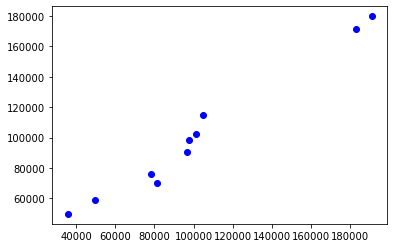

In [43]:
plt.scatter(Y_test,y_pred,color='b')
plt.show()